In [3]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_pickle(f"../2_features_extraction/Aapl_tfidf_features.pkl")
df

,news_timestamp,stock_timestamp,source,tokens,label,tokens_str,aa,aal,aam,aaron,...,zink,zion,zip,zipper,zo,zodiac,zombi,zone,zoom,zulu
0,2018-11-14 12:12:00,2018-11-15,9to5mac.com,"[thing, kick, monday, news, ming, cut, shipmen...",1,thing kick monday news ming cut shipment follo...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-11-05 00:00:00,2018-11-06,morningstar.com,"[share, trade, monday, follow, maker, stock, f...",1,share trade monday follow maker stock friday s...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-11-05 12:45:00,2018-11-06,seekingalpha.com,"[portfolio, current, sit, core, dividend, grow...",1,portfolio current sit core dividend growth tic...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-11-26 00:00:00,2018-11-27,morningstar.com,"[cristina, ker, implement, sever, boost, digit...",1,cristina ker implement sever boost digit strat...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-11-23 00:00:00,2018-11-26,zacks.com,"[trade, high, three, major, stock, index, lost...",-1,trade high three major stock index lost gain d...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71936,2019-01-24 07:19:00,2019-01-25,nasdaq.com,"[photo, top, tech, stock, higher, recent, trad...",1,photo top tech stock higher recent trade share...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71937,2019-01-14 20:18:00,2019-01-15,moveefy.com,"[news, trio, babi, falcon, band, cal, spill, r...",1,news trio babi falcon band cal spill report e ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71938,2018-12-31 00:00:00,2019-01-02,investing.com,"[major, index, other, group, amazon, rose, per...",-1,major index other group amazon rose percent bi...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71939,2019-01-28 19:00:00,2019-01-29,yahoo.com,"[might, amazon, game, evan, motley, fool, prem...",1,might amazon game evan motley fool premium new...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
dataset = 'Aapl'
methods = ['bert', 'word2vec', 'tfidf']

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame()

for method in methods:
    # Read the CSV file for each method
    ss = pd.read_csv(f'{dataset}_{method}_model_results.csv')
    
    # Add a column to identify the method
    ss.insert(0, 'method', method)
    
    # Concatenate the current DataFrame with the overall DataFrame
    results_df = pd.concat([results_df, ss], ignore_index=True)

# Sort the DataFrame by the 'Accuracy' column
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Round the values to one decimal place
results_df = results_df.round(2)

# Print the combined, sorted, and rounded DataFrame
results_df

FileNotFoundError: [Errno 2] No such file or directory: 'Aapl_tfidf_model_results.csv'

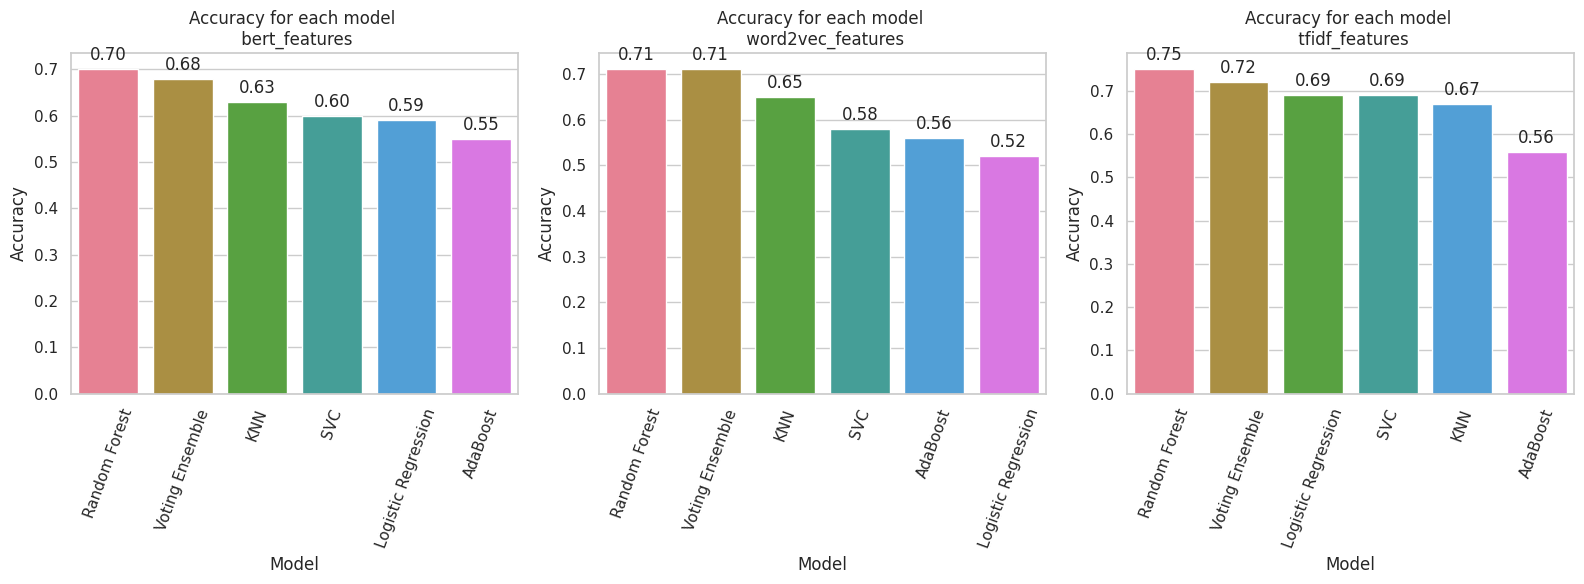

In [278]:
# Define a color palette for each model
palette = sns.color_palette("husl", n_colors=len(results_df['Model'].unique()))

# Create a single plot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Iterate through each method and create a bar plot in the corresponding subplot
for i, method in enumerate(methods):
    method_df = results_df[results_df['method'] == method]

    ax = sns.barplot(x='Model', y='Accuracy', hue='Model', data=method_df, ax=axes[i], palette=palette, dodge=False, legend=False)
    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Accuracy for each model \n {method}_features')
    ax.tick_params(axis='x', rotation=70)

    # Display accuracy values on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig(f'{dataset}_barplots.png')  # Save the figure
plt.show()

In [267]:
metric = "Accuracy"

#return name of best model according to the metric

best_model = results_df[results_df[metric] == results_df[metric].max()]['Model'].values[0]
best_method = results_df[results_df[metric] == results_df[metric].max()]['method'].values[0]
print(best_method,best_model)

tfidf Random Forest


In [269]:
best_method_predictions = pd.read_csv(f'{dataset}_{best_method}_all_predictions.csv')
best_model_pred = best_method_predictions.filter(like=best_model, axis=1)
best_model_pred

,Predicted Label (Random Forest)
0,-1
1,1
2,-1
3,-1
4,-1
...,...
3979,-1
3980,1
3981,-1
3982,-1


In [270]:
df = pd.read_pickle(f"../2_features_extraction/{dataset}_{method}_features.pkl")
X = df.iloc[:,2]
y = df.iloc[:, 4]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [271]:
x_test.reset_index(drop=True, inplace=True)
x_test

0          morningstar.com
1          marketwatch.com
2                   qq.com
3               nasdaq.com
4                yahoo.com
               ...        
3979    whatsonthorold.com
3980       morningstar.com
3981             zacks.com
3982       morningstar.com
3983             yahoo.com
Name: source, Length: 3984, dtype: object

In [272]:
y_test.reset_index(drop=True, inplace=True)
y_test

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
3979   -1
3980    1
3981   -1
3982   -1
3983   -1
Name: label, Length: 3984, dtype: int64

In [273]:
new_df = pd.DataFrame()

new_df['source'] = x_test
new_df['y_true'] = y_test
new_df['y_pred'] = best_model_pred

new_df

,source,y_true,y_pred
0,morningstar.com,-1,-1
1,marketwatch.com,-1,1
2,qq.com,-1,-1
3,nasdaq.com,-1,-1
4,yahoo.com,-1,-1
...,...,...,...
3979,whatsonthorold.com,-1,-1
3980,morningstar.com,1,1
3981,zacks.com,-1,-1
3982,morningstar.com,-1,-1


In [274]:
new_df['correct_predictions'] = (new_df['y_true'] == new_df['y_pred']).astype(int)
new_df

,source,y_true,y_pred,correct_predictions
0,morningstar.com,-1,-1,1
1,marketwatch.com,-1,1,0
2,qq.com,-1,-1,1
3,nasdaq.com,-1,-1,1
4,yahoo.com,-1,-1,1
...,...,...,...,...
3979,whatsonthorold.com,-1,-1,1
3980,morningstar.com,1,1,1
3981,zacks.com,-1,-1,1
3982,morningstar.com,-1,-1,1


In [275]:
# Calculate the total number of correct predictions and total predictions for each source
accuracy_data = new_df.groupby('source').agg(correct_predictions=('correct_predictions', 'sum'), total_predictions=('y_true', 'count')).reset_index()


# Calculate accuracy percentage
accuracy_data['accuracy %'] = (accuracy_data['correct_predictions'] / accuracy_data['total_predictions'])*100
accuracy_data['accuracy %'] = accuracy_data['accuracy %'].round(1)

# # Drop unnecessary columns
# accuracy_data = accuracy_data[['source', 'correct_predictions', 'accuracy %']]

# Remove sources with low total predictions
accuracy_data = accuracy_data[accuracy_data['total_predictions'] >= 75]


# # Sort the DataFrame by the 'correct_predictions' column in descending order
accuracy_data = accuracy_data.sort_values(by='accuracy %', ascending=False).reset_index(drop=True)

accuracy_data.head(10)

,source,correct_predictions,total_predictions,accuracy %
0,marketwatch.com,339,363,93.4
1,nasdaq.com,176,202,87.1
2,morningstar.com,307,354,86.7
3,zacks.com,160,197,81.2
4,fool.com,78,98,79.6
5,barrons.com,69,87,79.3
6,yahoo.com,313,403,77.7
7,investors.com,67,102,65.7
8,thestreet.com,74,113,65.5
9,investorplace.com,56,93,60.2


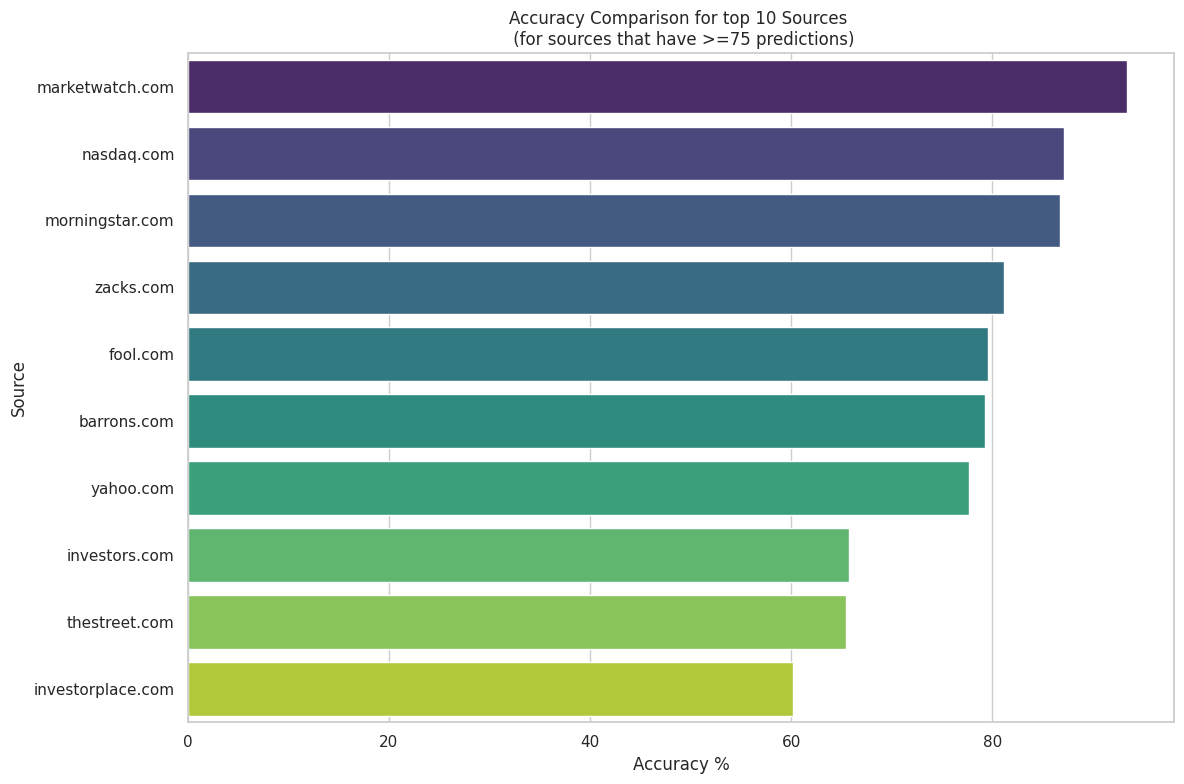

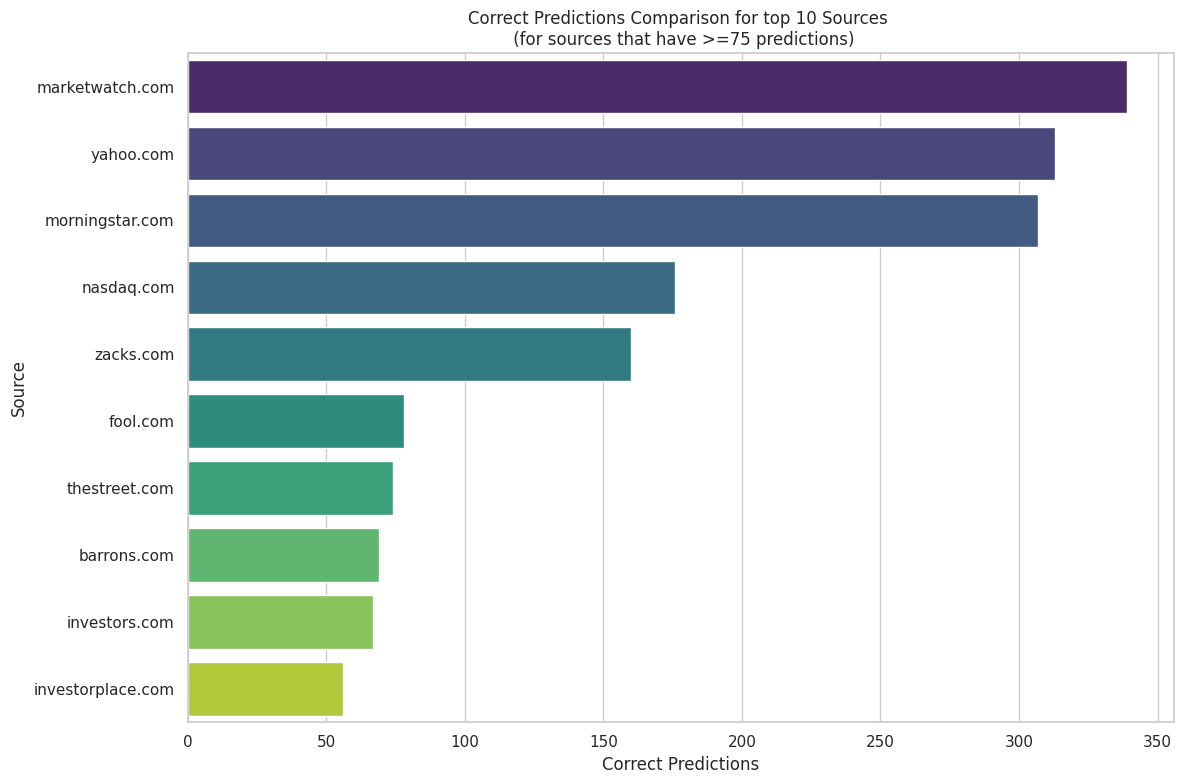

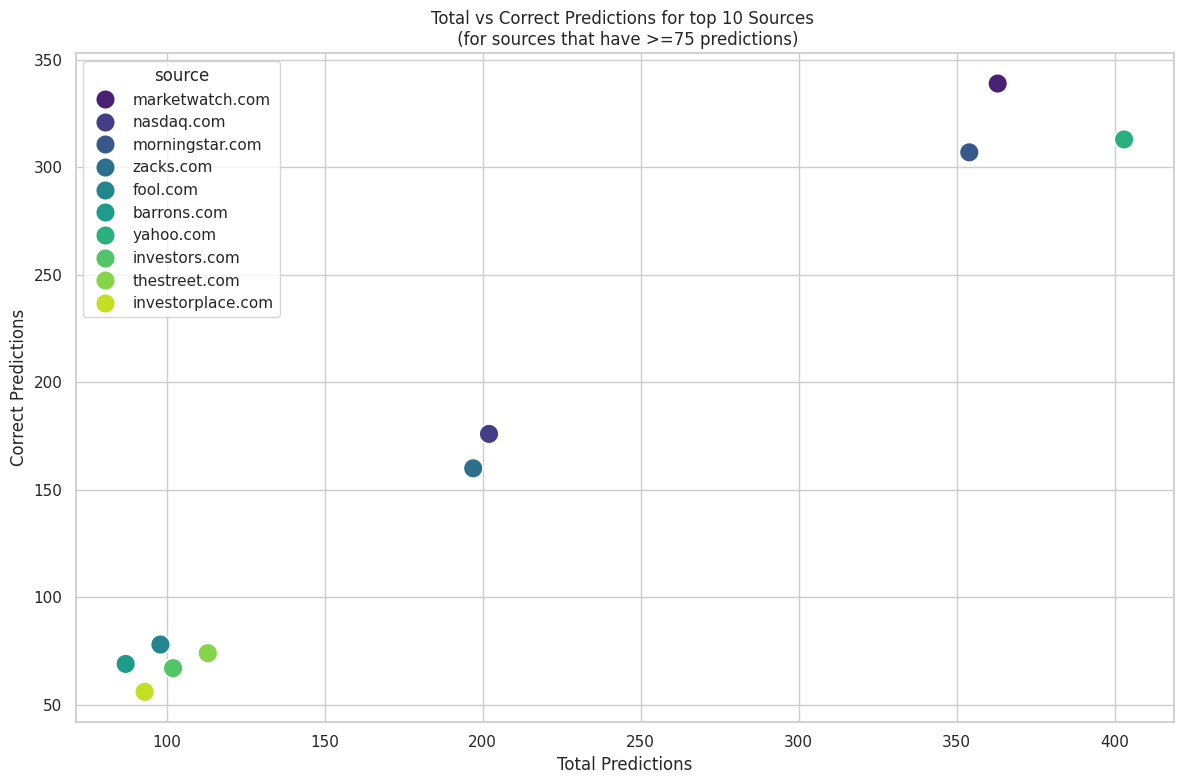

In [277]:
df = accuracy_data[0:10]

sns.set(style="whitegrid")

# Plot 1
plt.figure(figsize=(12, 8))
sns.barplot(x='accuracy %', y='source', hue='source', palette='viridis', data=df.sort_values(by='accuracy %', ascending=False))
plt.title('Accuracy Comparison for top 10 Sources \n (for sources that have >=75 predictions)')
plt.xlabel('Accuracy %')
plt.ylabel('Source')
plt.tight_layout()
plt.savefig(f'{dataset}_accuracy_comparison_plot.png')  # Save the figure
plt.show()

# Plot 2
plt.figure(figsize=(12, 8))
sns.barplot(x='correct_predictions', y='source', hue='source', palette='viridis',data=df.sort_values(by='correct_predictions', ascending=False))
plt.title('Correct Predictions Comparison for top 10 Sources \n (for sources that have >=75 predictions)')
plt.xlabel('Correct Predictions')
plt.ylabel('Source')
plt.tight_layout()
plt.savefig(f'{dataset}_correct_predictions_comparison_plot.png')  # Save the figure
plt.show()

# Plot 3
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_predictions', y='correct_predictions', palette='viridis', hue='source', data=df, s=200)
plt.title('Total vs Correct Predictions for top 10 Sources \n (for sources that have >=75 predictions)')
plt.xlabel('Total Predictions')
plt.ylabel('Correct Predictions')
plt.tight_layout()
plt.savefig(f'{dataset}_total_vs_correct_predictions_plot.png')  # Save the figure
plt.show()